In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from UseEnvDT import UseEnvDigitalTwin as ue

In [17]:
import seaborn as sns


In [2]:
env_data_dr = "./data/"
ds = pd.read_csv(env_data_dr+"WeatherTide_digitaltwin_1h.csv")

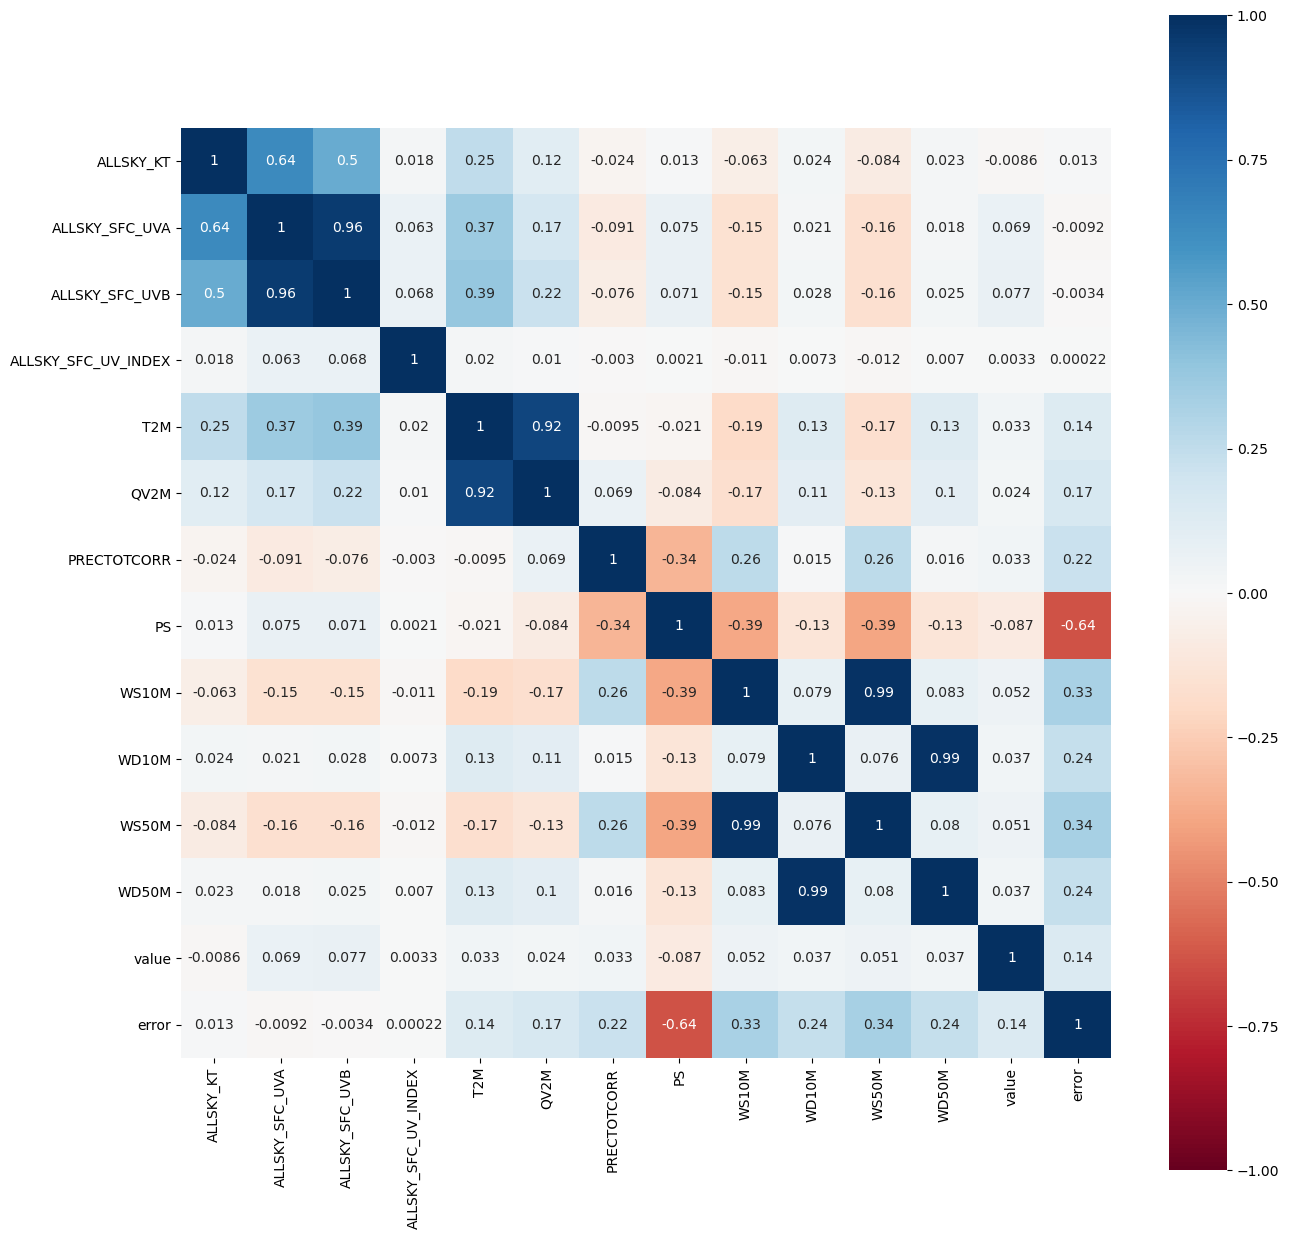

In [3]:
ue(ds).covariance()

The tides (i.e. value) does not show any particular correlation with other variables

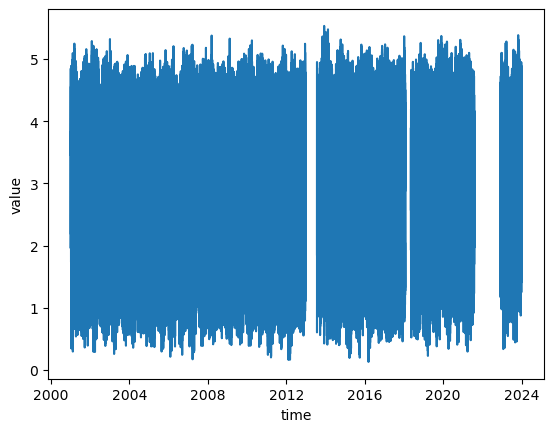

In [4]:
ue(ds).time_series("value")

We can look into the relation between the tides and the time

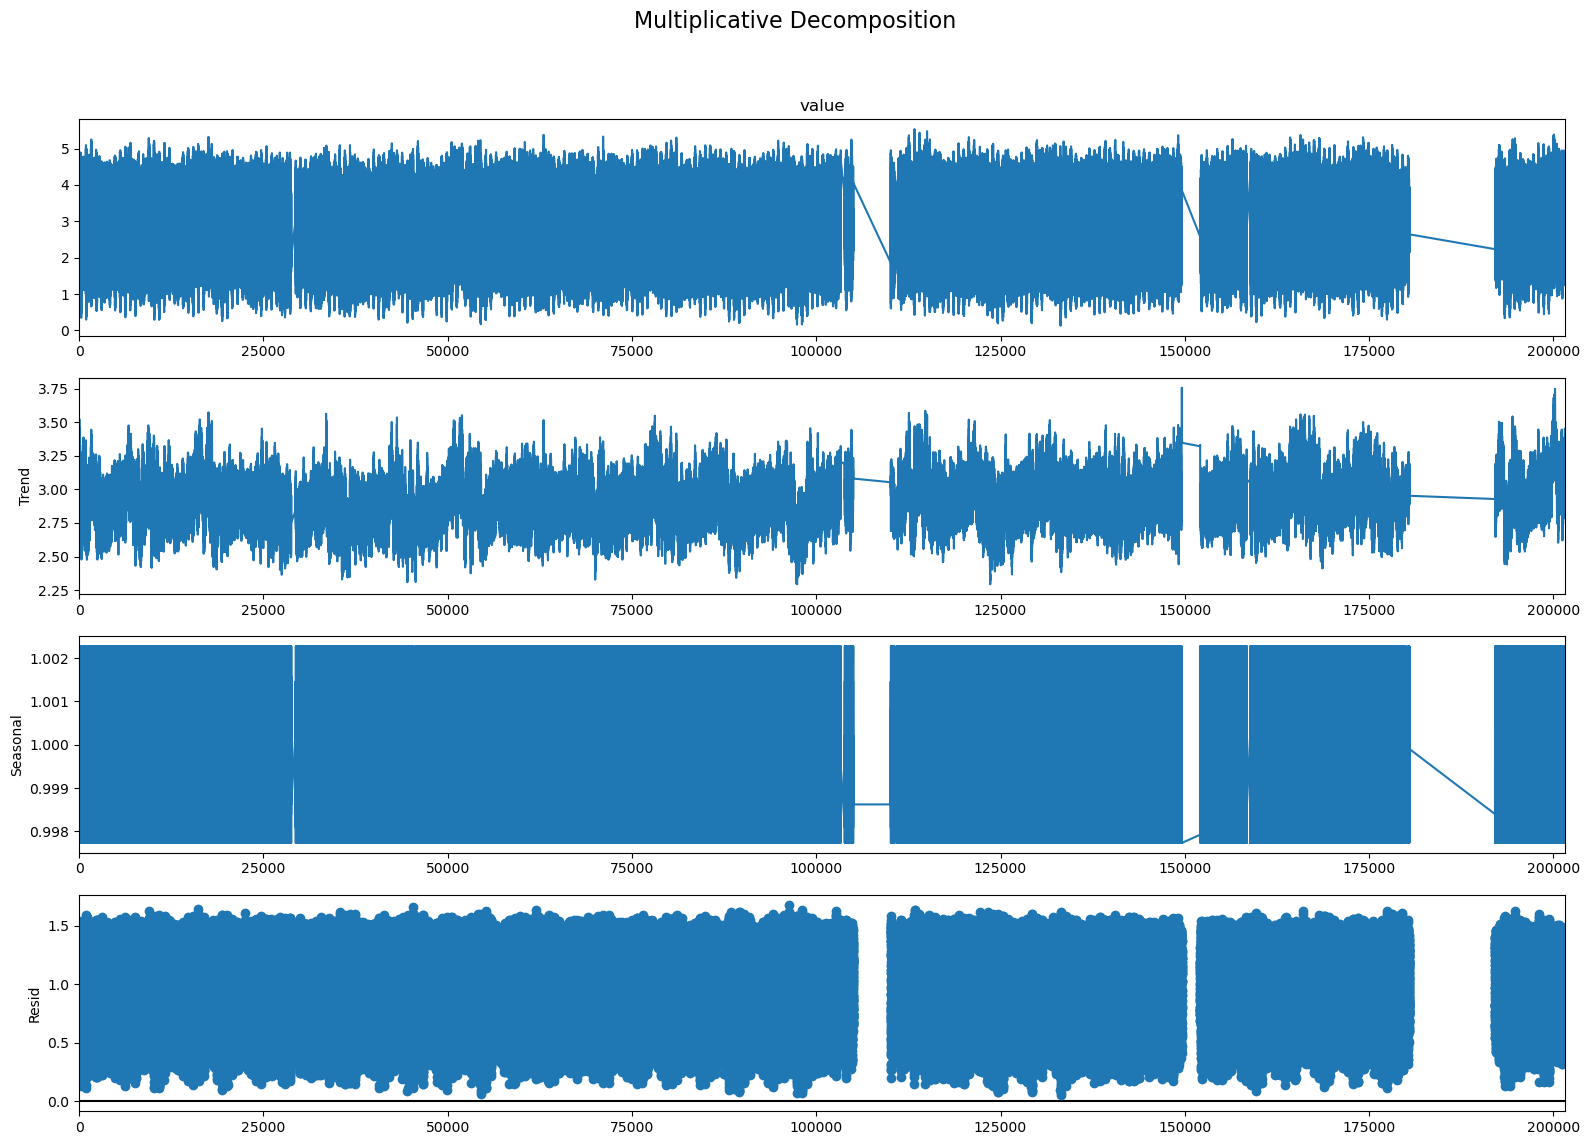

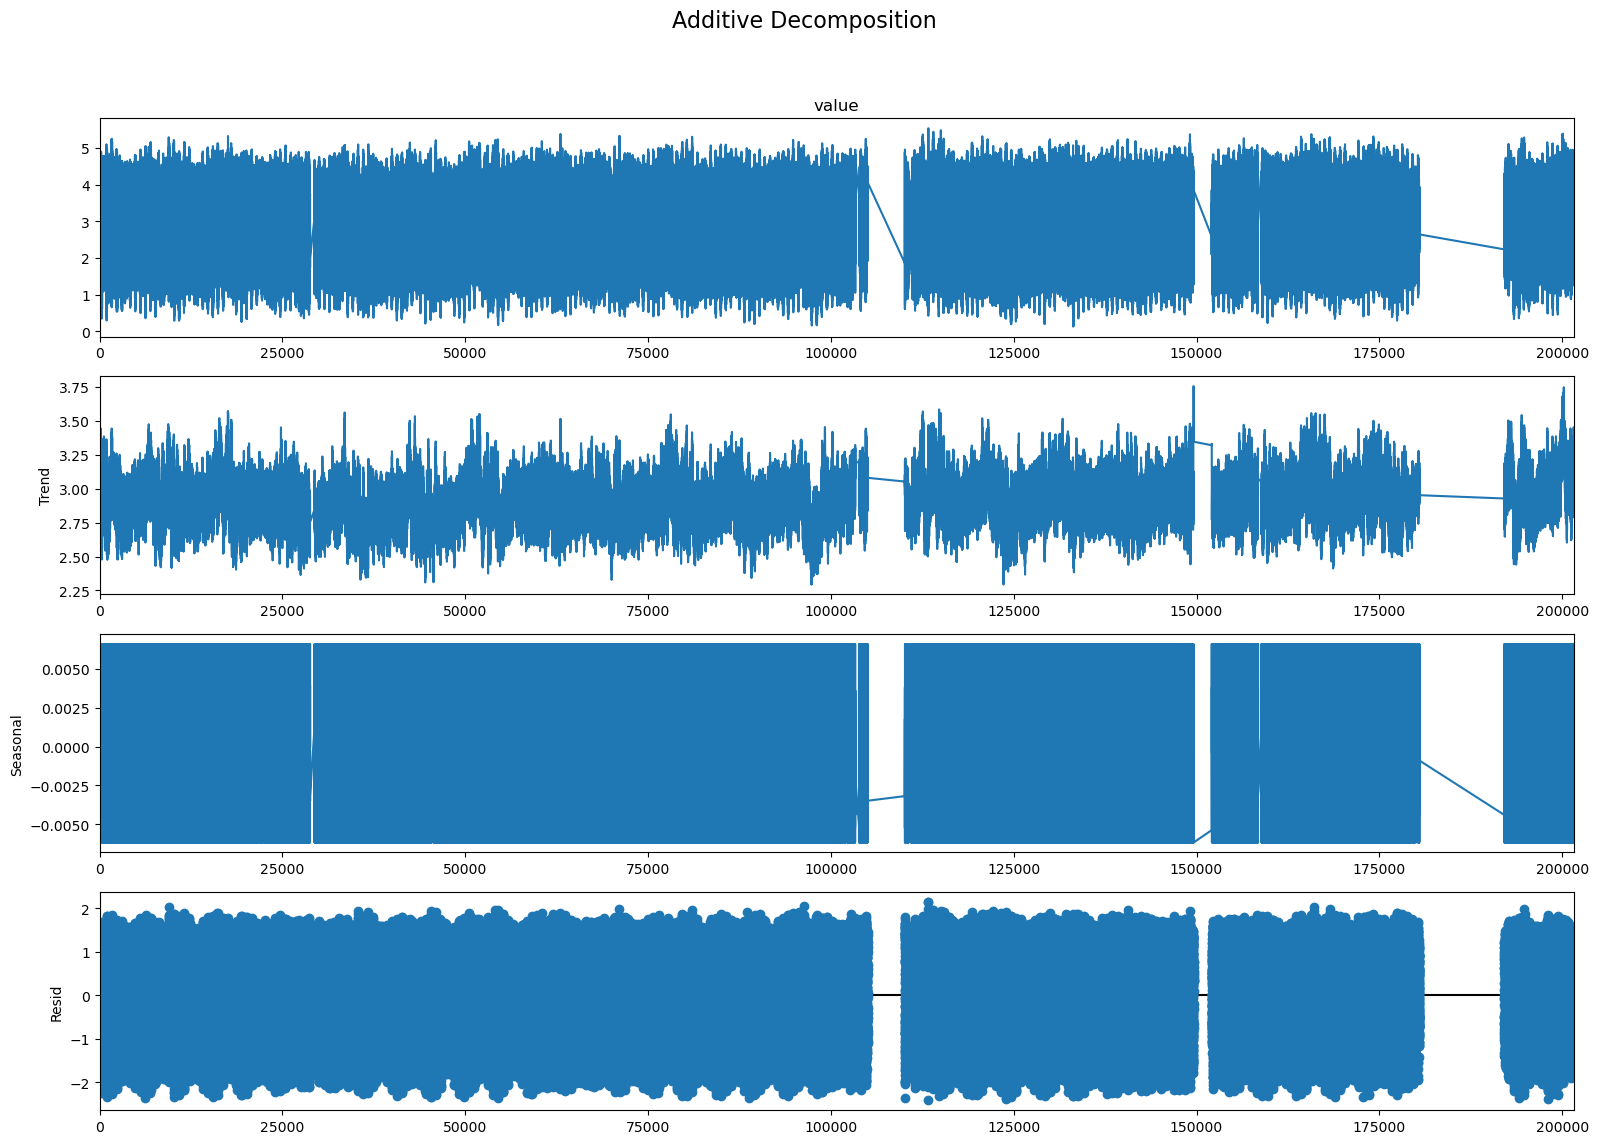

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(ds['value'].dropna(), model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(ds['value'].dropna(), model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

We can see how these decomposition have really high residual --> the dependeny with time is not trivial

We can see if we find any kind of correlation with time features. To do so we do some feature engineering.
We consider:
- time of the day
- season
- trigonometry for month and day
- year

In [9]:
date = pd.to_datetime(ds["date"])


In [39]:
time = date.dt.hour.values
month = date.dt.month
season = np.where(month.isin(np.arange(4,10)), 0, 1)
# Calculating cyclical features for month
sine_month = np.sin(2 * np.pi * date.dt.month.values / 12)
cosine_month = np.cos(2 * np.pi * date.dt.month.values / 12)

# Calculating cyclical features for day (assuming a maximum of 31 days)
sine_day = np.sin(2 * np.pi * date.dt.day.values / 31)
cosine_day = np.cos(2 * np.pi * date.dt.day.values / 31)

year = date.dt.year.values

In [40]:
dataset = pd.DataFrame({'tide': ds["value"], 'time': time, \
                       'season' : season, 'sine_month':sine_month, 'cosine_month':cosine_month,\
                       'sine_day': sine_day, 'cosine_day':cosine_day, 'year':year})

In [41]:
dataset

,tide,time,season,sine_month,cosine_month,sine_day,cosine_day,year
0,3.46275,0,1,5.000000e-01,0.866025,2.012985e-01,0.97953,2001
1,4.09650,1,1,5.000000e-01,0.866025,2.012985e-01,0.97953,2001
2,4.47800,2,1,5.000000e-01,0.866025,2.012985e-01,0.97953,2001
3,4.37225,3,1,5.000000e-01,0.866025,2.012985e-01,0.97953,2001
4,4.18950,4,1,5.000000e-01,0.866025,2.012985e-01,0.97953,2001
...,...,...,...,...,...,...,...,...
201595,1.70950,19,1,-2.449294e-16,1.000000,-2.449294e-16,1.00000,2023
201596,1.89425,20,1,-2.449294e-16,1.000000,-2.449294e-16,1.00000,2023
201597,2.07825,21,1,-2.449294e-16,1.000000,-2.449294e-16,1.00000,2023
201598,2.34200,22,1,-2.449294e-16,1.000000,-2.449294e-16,1.00000,2023


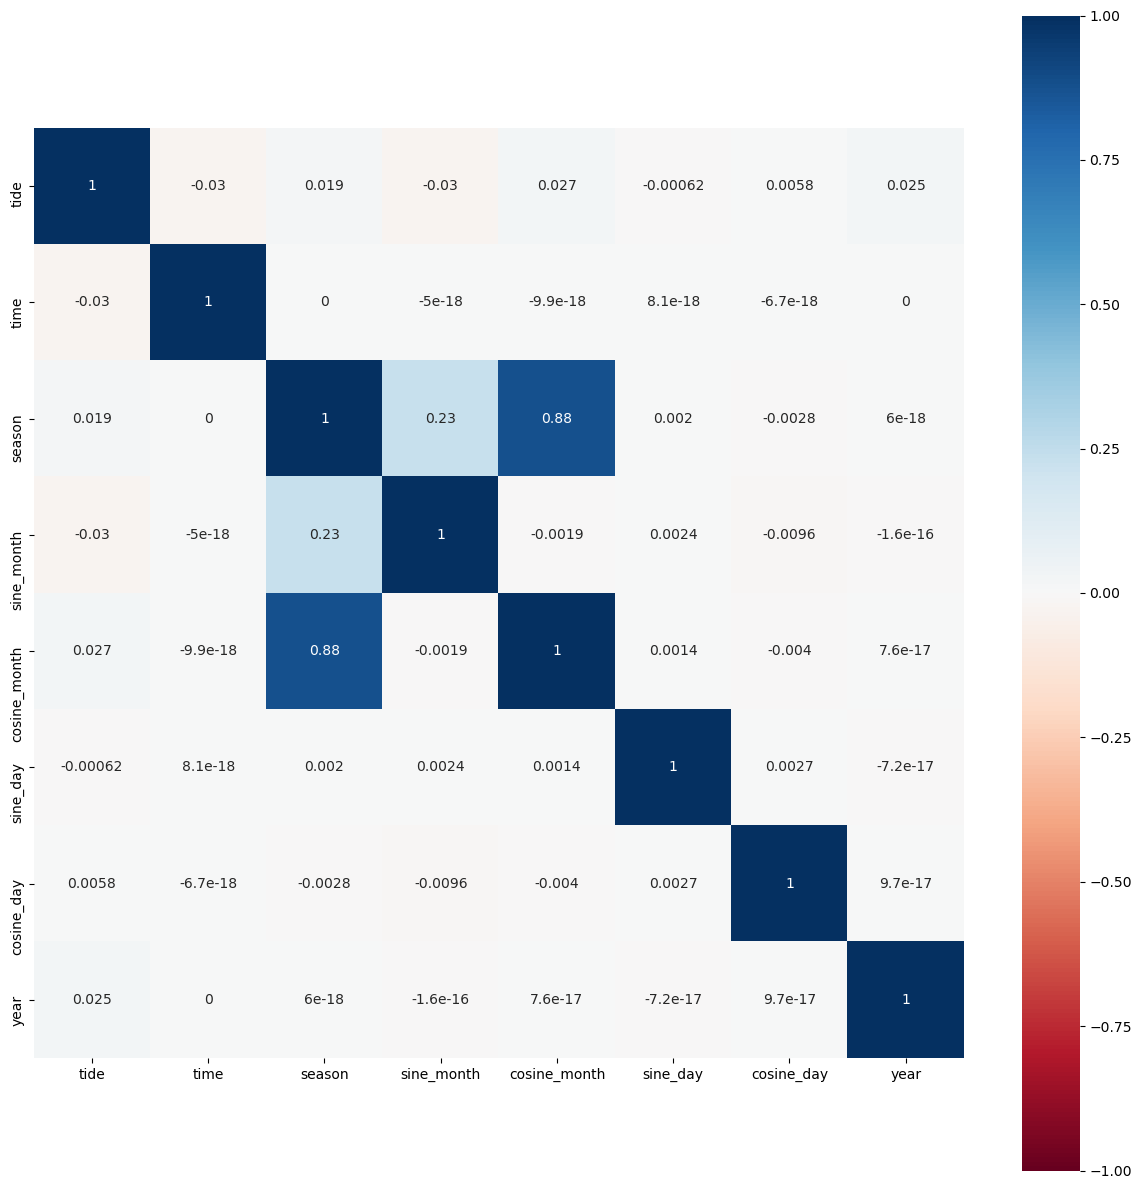

In [42]:
corrmat = dataset.corr().dropna(how="all", axis="columns").dropna(how="all", axis="rows")
f, ax = plt.subplots( figsize=(15, 15))
fig = sns.heatmap(corrmat, vmax=1, square=True, cmap="RdBu",  annot=True, vmin=-1);

plt.show()

We cannot see any correlation with time features

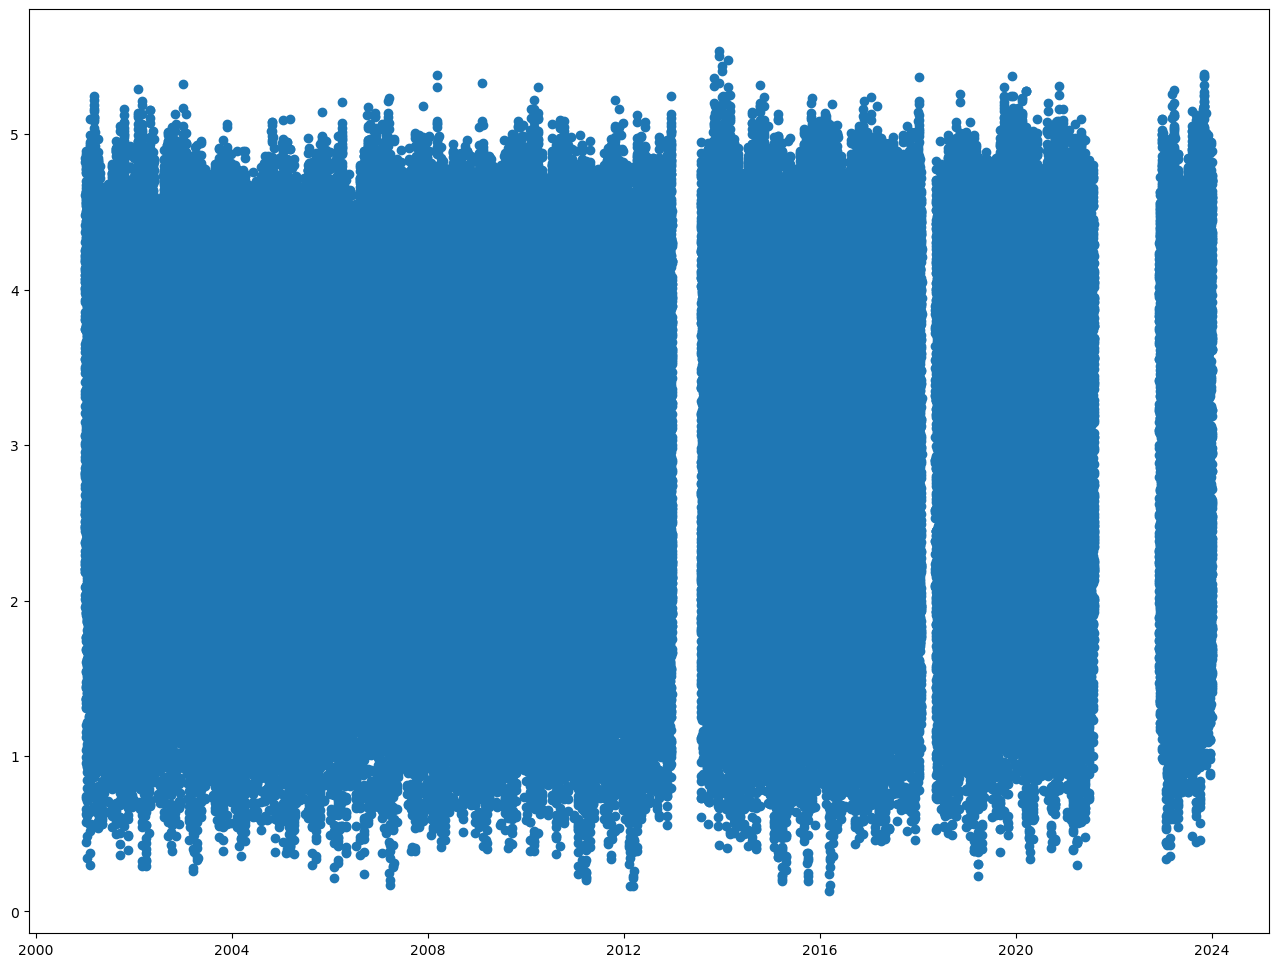

In [43]:
plt.scatter(ds["date"], ds["value"])
plt.show()